<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\ehhrw\Downloads\m2_survey_data.csv')

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

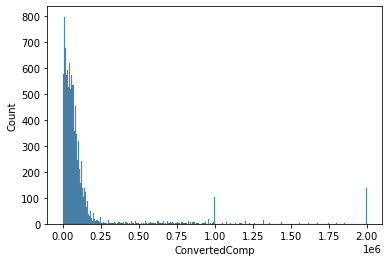

In [5]:
# your code goes here
sns.histplot(df['ConvertedComp'])

### Box Plots


Plot a box plot of `Age.`


C:\Users\ehhrw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

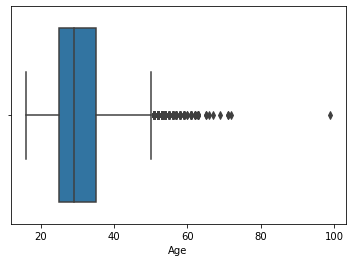

In [6]:
# your code goes here
sns.boxplot(df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

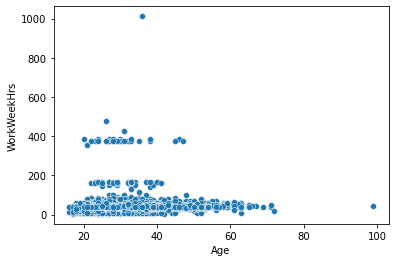

In [9]:
# your code goes here

sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], data=df)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


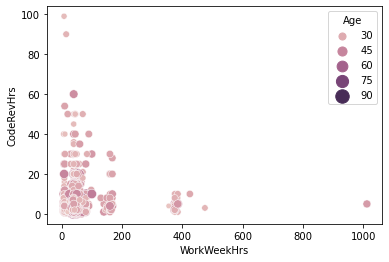

In [17]:
# your code goes here
#sns.scatterplot(x='WorkWeekHrs, y='CodeRevHrs', data=df, hue='Age', size='Age', sizes=(20,200))
ax = sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', sizes=(20,200))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


(-1.1122186912758876,
 1.1022067141379202,
 -1.1141121039585224,
 1.1987987102007944)

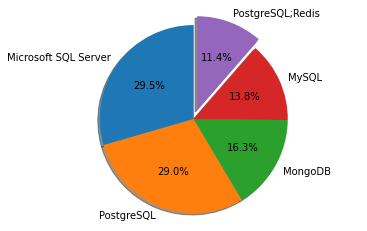

In [34]:
# your code goes here
#df['DatabaseDesireNextYear'].sort_values(ascending=False)
df2 = df['DatabaseDesireNextYear'].value_counts()[:5]
labels = df2.index
sizes = df2.values
explode = (0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # equal so pie will be drawn as circle

In [ ]:
"""import matplotlib.pyplot as plt
%matplotlib inline

QUERY = """
SELECT DatabaseDesireNextYear, count(*) as c1
FROM DataBaseDesireNextYear
group by DatabaseDesireNextYear
order by c1 DESC
"""
df = pd.read_sql_query(QUERY, conn)

# Create the chart
labels = df['DatabaseDesireNextYear'].head(5)
sizes = df['c1'].head(5)
explode = (0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # equal so pie will be drawn as circle

plt.show()"""

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [78]:
# your code goes here
cons1 = df['Age'] < 35
cons2 = df['Age'] > 30
df3 = df.query('Age > 30' and 'Age < 35')
df3 = df3[['WorkWeekHrs','CodeRevHrs','Age']]
df3
#df['Age'].dtype

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0
...,...,...,...
11392,56.0,14.0,32.0
11394,40.0,5.0,25.0
11395,40.0,5.0,34.0
11396,42.5,2.0,25.0


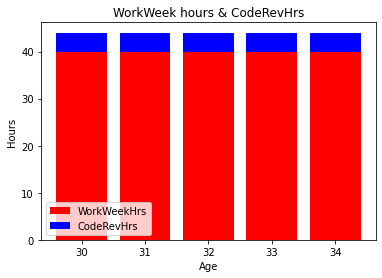

In [79]:
l1 = [30,31,32,33,34,35]
l2 = []
l3 = []

for i in l1:
    l2.append(df3[df3['Age']==i]['WorkWeekHrs'].median())
    l3.append(df3[df3['Age']==i]['CodeRevHrs'].median())

# Chart
labels = l1
y1 = l2
y2 = l3

plt.bar(labels, y1, color='r')
plt.bar(labels, y2, bottom=y1, color='b')
plt.legend(['WorkWeekHrs', 'CodeRevHrs'])
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('WorkWeek hours & CodeRevHrs')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


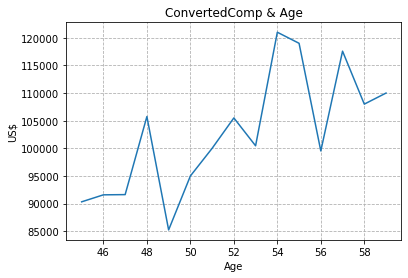

In [82]:
# your code goes here
df4 = df.query('Age 45 30' and 'Age < 60')
df4 = df4[['ConvertedComp', 'Age']]
l1 = range(45, 60)
l2 = []
for i in l1:
    l2.append(df4[df4['Age'] == i]['ConvertedComp'].median())
    
    
    
plt.figure()
plt.plot(l1, l2)

plt.xlabel('Age')
plt.ylabel('US$')
plt.title('ConvertedComp & Age')
plt.grid(True, linestyle='--')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


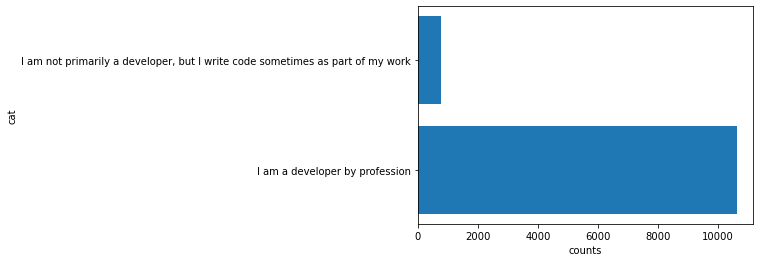

In [108]:
# your code goes here
plt.figure()
data = df['MainBranch'].value_counts()

plt.barh(data.index, data.values)
plt.xlabel('counts')
plt.ylabel('cat')
plt.show()s

In [ ]:
data.index

Index(['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes as part of my work'], dtype='object')

Close the database connection.


In [110]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [121]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                           1472
Developer, back-end                                                                                                                                                                                                                                                                              752
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                                   446
Developer, back-end;Developer, full-stack                                                                                

In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
